In [1]:
import os
from os import listdir
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from matplotlib import patches

In [43]:
train_labels = pd.read_csv('train_labels.csv')['label'].tolist()
train_labels = np.array(train_labels)

In [4]:
train = listdir('./train')
test = listdir('./test')

In [5]:
train[:5]

['f0c2a0b8ef3024f407fa97d852d49be0215cafe0.tif',
 '99ef485f205645918613cd04281098daa7c17819.tif',
 'e2612e173abd0e8bb54a3c3db3f264b63d80bffb.tif',
 '6d1bb57c0606f05dbd75f90a8d9e21a57e1267e0.tif',
 '9c043ab2adadfeb758c71d21432fccd3e43565c0.tif']

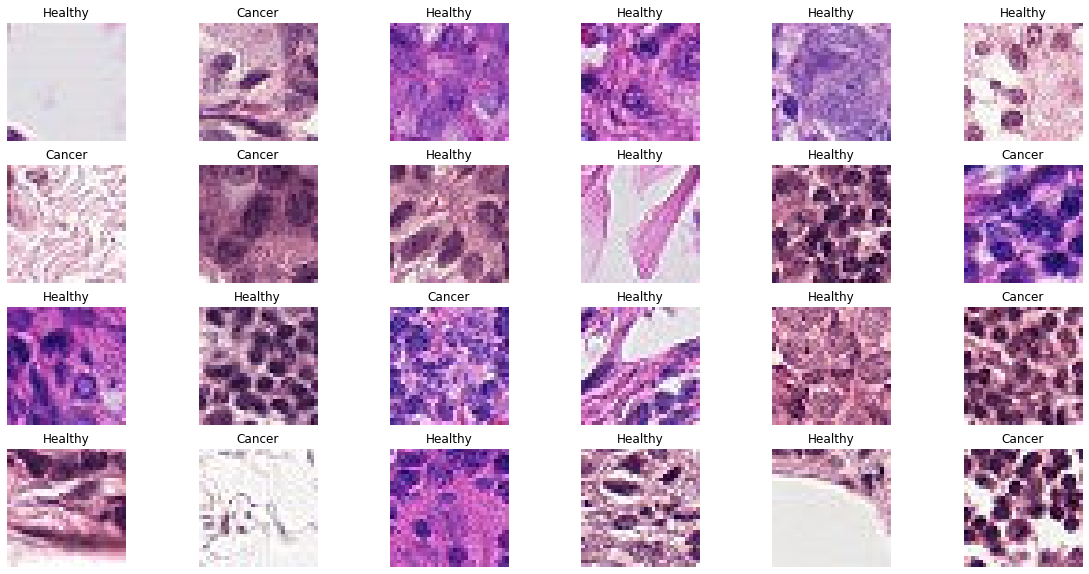

In [6]:
#Visualize the first 24 examples in the training set
#The detected regions are marked by the rectangles
fig, ax = plt.subplots(4, 6, figsize=(20,10))
for r in range(4):
    for c in range(6):
        img = Image.open('./train/'+train[r*6+c])
        ax[r,c].imshow(img)
        ax[r,c].grid(False)
        ax[r,c].tick_params(labelbottom=False)
        if train_labels['label'][r*6+c] == 0:
            ax[r,c].set_title('Healthy')
            rect = patches.Rectangle((32,32),32,32,linewidth=3,edgecolor="aquamarine",facecolor="none", linestyle=":", capstyle="round")
            ax[r,c].add_patch(rect)
        else:
            ax[r,c].set_title('Cancer')
            rect = patches.Rectangle((32,32),32,32,linewidth=3,edgecolor="r",facecolor="none", linestyle="solid", capstyle="round")
            ax[r,c].add_patch(rect)
        ax[r,c].axis('off')

In [7]:
fig.savefig('visualization.png')

In [8]:
type(train)

list

In [10]:
import cv2

In [8]:
img = cv2.imread("./train/0a0a2e923bdedb11f270dcd3f11d0f001df98f00.tif")
cv2.imshow('img',img)
crop_img = img[32:64, 32:64]
cv2.imshow("cropped", crop_img)
cv2.waitKey(0)

32

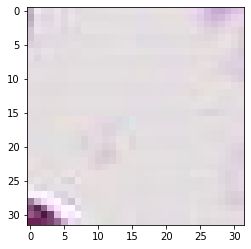

In [11]:
for img in os.listdir('./train'):
    img_array = cv2.imread('./train/'+img, cv2.IMREAD_COLOR)
    plt.imshow(img_array)
    plt.show()
    break

In [13]:
img_array.shape

(32, 32, 3)

In [37]:
def load_train():
    train_data = []
    for img in os.listdir('./train'):
        img_array = cv2.imread('./train/'+img, cv2.IMREAD_COLOR)
        train_data.append(img_array)
    train_data = np.array(train_data)
        
    return train_data
        
train_data = load_train()

In [38]:
train_data.shape

(220025, 32, 32, 3)

In [45]:
import pickle

pickle_out = open("train_data.pickle","wb")
pickle.dump(train_data, pickle_out)
pickle_out.close()

pickle_in = open("train_data.pickle","rb")
X = pickle.load(pickle_in)


In [51]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

In [59]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(train_data.shape[1:])))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', input_shape=(train_data.shape[1:])))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=0.001), metrics=['accuracy'])

fit = model.fit(train_data, to_categorical(train_labels), epochs=10)




Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
6876/6876 [==============================] - 45s 6ms/step - loss: 0.8578 - accuracy: 0.5912
Epoch 2/10
6876/6876 [==============================] - 45s 6ms/step - loss: 0.6758 - accuracy: 0.5948
Epoch 3/10
6876/6876 [==============================] - 45s 6ms/step - loss: 0.6750 - accuracy: 0.5959
Epoch 4/10
1507/6876 [=====>........................] - E

KeyboardInterrupt: 

In [47]:
#loss, accuracy = model.evaluate(test_data, test_labels)

In [ ]:
plt.plot(fit.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')